In [892]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
from matplotlib.axis import Axis
import datetime as dt

In [893]:
def get_data2(filename):    
    data = pd.read_csv(filename) #, names=["Interval","kWh"])
    return data

In [894]:
conso_file = r"\\192.168.0.175\pihome\Documents\conso2.csv"
conso_data = get_data2(conso_file)
conso_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1062461 entries, 0 to 1062460
Data columns (total 2 columns):
 #   Column    Non-Null Count    Dtype  
---  ------    --------------    -----  
 0   Interval  1062461 non-null  int64  
 1   kWh       1062461 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 16.2 MB


In [895]:
conso_data['kWh']

0          0.16
1          0.16
2          0.16
3          0.16
4          0.16
           ... 
1062456    2.31
1062457    2.31
1062458    2.32
1062459    2.30
1062460    2.30
Name: kWh, Length: 1062461, dtype: float64

In [896]:
conso_data['kWh']

0          0.16
1          0.16
2          0.16
3          0.16
4          0.16
           ... 
1062456    2.31
1062457    2.31
1062458    2.32
1062459    2.30
1062460    2.30
Name: kWh, Length: 1062461, dtype: float64

In [897]:
l=len(conso_data)-1
l

1062460

In [898]:
conso_data['sec']=conso_data['Interval']/1000


In [899]:
conso_data['Wh']=3600000/conso_data['Interval']


In [900]:
conso_data['cumul(ms)']=conso_data['Interval'].cumsum(axis=0)

In [901]:
conso_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1062461 entries, 0 to 1062460
Data columns (total 5 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   Interval   1062461 non-null  int64  
 1   kWh        1062461 non-null  float64
 2   sec        1062461 non-null  float64
 3   Wh         1062461 non-null  float64
 4   cumul(ms)  1062461 non-null  int64  
dtypes: float64(3), int64(2)
memory usage: 40.5 MB


In [902]:
conso_data.tail()

,Interval,kWh,sec,Wh,cumul(ms)
1062456,1561,2.31,1.561,2306.213965,24414154496
1062457,1558,2.31,1.558,2310.654685,24414156054
1062458,1555,2.32,1.555,2315.112540,24414157609
1062459,1563,2.30,1.563,2303.262956,24414159172
1062460,1565,2.30,1.565,2300.319489,24414160737


In [903]:
cumtime= int(conso_data._get_value(l,'cumul(ms)')*1000)  # convert to microseconds
cumtime

24414160737000

In [904]:
from datetime import datetime, timedelta
now = datetime.now()
# conso.csv dynamique
base = now - timedelta(microseconds=cumtime)
base  # date de début

datetime.datetime(2023, 8, 21, 17, 53, 54, 994964)

In [905]:
conso_data['cumul(ms)'][conso_data['cumul(ms)'].isna()==True]

Series([], Name: cumul(ms), dtype: int64)

In [906]:
conso_data.iloc[0]


Interval     21934.00000
kWh              0.16000
sec             21.93400
Wh             164.12875
cumul(ms)    21934.00000
Name: 0, dtype: float64

In [907]:
conso_data['dates'] = [base + dt.timedelta(microseconds=t*1000) for t in conso_data['cumul(ms)']]


In [908]:
conso_data['days']= [d.strftime('%d/%m/%y') for d in conso_data['dates']]    
#[str(d.month)+'-'+str(d.day) for d in conso_data['dates']]
conso_data

,Interval,kWh,sec,Wh,cumul(ms),dates,days
0,21934,0.16,21.934,164.128750,21934,2023-08-21 17:54:16.928964,21/08/23
1,21858,0.16,21.858,164.699424,43792,2023-08-21 17:54:38.786964,21/08/23
2,22001,0.16,22.001,163.628926,65793,2023-08-21 17:55:00.787964,21/08/23
3,21928,0.16,21.928,164.173659,87721,2023-08-21 17:55:22.715964,21/08/23
4,21891,0.16,21.891,164.451144,109612,2023-08-21 17:55:44.606964,21/08/23
...,...,...,...,...,...,...,...
1062456,1561,2.31,1.561,2306.213965,24414154496,2024-05-30 07:36:29.490964,30/05/24
1062457,1558,2.31,1.558,2310.654685,24414156054,2024-05-30 07:36:31.048964,30/05/24
1062458,1555,2.32,1.555,2315.112540,24414157609,2024-05-30 07:36:32.603964,30/05/24
1062459,1563,2.30,1.563,2303.262956,24414159172,2024-05-30 07:36:34.166964,30/05/24


In [909]:
# tranche journalière
now = datetime.now()
month = now.month
year = now.year
day = now.strftime('%d/%m/%y')    #str(now.month)+'-'+str(now.day)
day, month, year


('30/05/24', 5, 2024)

In [910]:
here = now.strftime('%H:%M:%S')
here

'07:37:00'

In [911]:
conso_day = conso_data[conso_data['days']==day]
# save to file
filename='conso_jour.csv'
conso_day.to_csv(filename)
filename='../conso_jour.csv'
conso_day.to_csv(filename)

In [912]:
conso_day

,Interval,kWh,sec,Wh,cumul(ms),dates,days
1061649,28434,0.13,28.434,126.608989,24386777101,2024-05-30 00:00:12.095964,30/05/24
1061650,27274,0.13,27.274,131.993840,24386804375,2024-05-30 00:00:39.369964,30/05/24
1061651,27423,0.13,27.423,131.276666,24386831798,2024-05-30 00:01:06.792964,30/05/24
1061652,28418,0.13,28.418,126.680273,24386860216,2024-05-30 00:01:35.210964,30/05/24
1061653,28544,0.13,28.544,126.121076,24386888760,2024-05-30 00:02:03.754964,30/05/24
...,...,...,...,...,...,...,...
1062456,1561,2.31,1.561,2306.213965,24414154496,2024-05-30 07:36:29.490964,30/05/24
1062457,1558,2.31,1.558,2310.654685,24414156054,2024-05-30 07:36:31.048964,30/05/24
1062458,1555,2.32,1.555,2315.112540,24414157609,2024-05-30 07:36:32.603964,30/05/24
1062459,1563,2.30,1.563,2303.262956,24414159172,2024-05-30 07:36:34.166964,30/05/24


In [913]:
# group by day
grouped = conso_data[['days','kWh']].groupby('days', sort=False)
'''conso_graph=[]
for name, group in grouped:
    if name=='01/04/2024':print(group)
    #print("\n", name, len(group)/1000)
    conso_graph.append((name,len(group)/1000))'''
#grouped
# count elements in each group => conso in watts => convert to kW
df_grp = grouped.count()/1000


In [914]:
data = list(df_grp['kWh'])
print(data)


[0.99, 3.704, 4.226, 3.731, 4.234, 4.619, 3.449, 3.437, 3.532, 3.62, 3.945, 3.682, 4.267, 3.867, 3.389, 3.633, 3.28, 3.471, 4.218, 4.045, 4.047, 3.96, 3.422, 4.428, 3.747, 3.756, 4.53, 4.644, 3.691, 3.155, 3.185, 4.102, 3.577, 3.182, 3.797, 4.167, 3.756, 3.553, 4.797, 4.222, 4.504, 3.751, 3.375, 4.339, 3.878, 3.883, 3.451, 4.078, 3.631, 3.396, 4.103, 3.409, 3.914, 3.808, 3.647, 3.733, 4.234, 3.28, 3.9, 2.916, 2.055, 2.041, 2.529, 4.086, 3.76, 4.325, 3.662, 3.855, 3.732, 4.059, 3.847, 4.178, 3.628, 3.179, 3.753, 3.541, 3.596, 3.702, 3.677, 3.234, 3.894, 3.281, 3.747, 3.585, 4.11, 3.668, 3.313, 3.778, 4.12, 4.351, 4.088, 4.084, 4.105, 3.75, 3.934, 3.899, 3.885, 3.769, 4.06, 4.293, 3.882, 3.53, 3.661, 3.671, 3.337, 3.865, 3.975, 4.122, 3.463, 4.181, 3.622, 4.153, 4.454, 3.724, 3.385, 3.593, 4.332, 3.504, 4.131, 3.938, 3.733, 3.607, 5.129, 3.693, 3.763, 4.326, 4.071, 4.844, 4.391, 3.909, 3.803, 4.42, 4.532, 4.352, 4.723, 4.359, 3.61, 4.271, 3.712, 3.539, 3.52, 4.022, 3.605, 3.793, 3.571, 3

In [915]:
# save to file
import pickle
path = r'kwh_mean.pkl'
with open(path,'wb') as file:
    pickle.dump(data, file)

In [916]:
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
def show(day,pltcolor='darkcyan',bgcolor="ivory"):
    conso_day=conso_data[conso_data['days']==day].copy()  # no more error
    conso_day['heure']=conso_day['dates'].apply(lambda x: str(x.hour)+':'+str(x.minute) +':'+str(x.second))
    #=[x.hour for x in conso_day['dates']]
    df= conso_day.set_index('heure')
    here = now.strftime('%H:%M:%S')
    conso_jour=len(df['kWh'])
    here, len(df)/1000, conso_jour

    # consommation d'une journée entière à partir de minuit
    # Set background color of the outer 
    # area of the plt
    #plt.figure(facecolor=fgcolor)
    fig, ax = plt.subplots(facecolor=pltcolor)
    
    major_ticks=300;minor_ticks=100
    ax.xaxis.set_major_locator(MultipleLocator(major_ticks))  # major ticks tous les 15 min
    ax.xaxis.set_minor_locator(MultipleLocator(minor_ticks))
    # the size of A4 paper
    fig.set_size_inches(10, 5)
    
    # set bg color
    ax.set_facecolor(bgcolor)
    plt.plot(df['kWh'])
    #plt.plot(conso_day['heure'],conso_day['kWh'])
    plt.title(f'Journée du {day} {here} : {conso_jour/1000} kwh')
    plt.grid()


In [917]:
def conso_byhour(day):
    conso_day=conso_data[conso_data['days']==day].copy()  # no more error
    conso_day['heure']=conso_day['dates'].apply(lambda x: str(x.hour)+':'+str(x.minute) +':'+str(x.second))

    conso_hours = conso_day.copy()
    conso_hours['hours']= conso_hours['dates'].dt.strftime('%H')
    conso_hours#.info()
    # group by hour
    groupedbyhour = conso_hours[['hours','kWh']].groupby('hours', sort=False)
    groupedbyhour.count()
    len(groupedbyhour)
    x = np.arange(1,len(groupedbyhour)+1)

    #groupedbyhour.count().plot(grid=True,xticks=x)
    plt.figure(figsize=(12, 8),facecolor='darkcyan')
    values = groupedbyhour.count().kWh
    #ax = plt.bar(x,groupedbyhour.count().kWh)
    ax = values.plot(kind="bar",color='green',width=.8)
    ax.set_facecolor('antiquewhite')
    #plt.grid()
    plt.tight_layout()
    plt.title(f'Conso by hour (W) - {day}')
    plt.xlim(-1,len(x)+1)
    
    rects = ax.patches

    # Make some labels.
    labels = [f"{i}" for i in values]
    
    for rect, label in zip(rects, labels):
        height = rect.get_height()
        ax.text(
            rect.get_x() + rect.get_width() / 2, height + 5, label, ha="center", va="bottom",
            fontfamily='calibri', fontsize=16, fontweight='bold', color='blue'
        )
    
    

In [918]:
# mean of all instant conso
total_mean = conso_data[['kWh']].mean()
total_mean

kWh    0.314758
dtype: float64

In [919]:
mean=(grouped.count()/1000).mean()
mean

kWh    3.74106
dtype: float64

In [920]:
last=df_grp.iloc[-1]['kWh']
last

0.812

<Axes: xlabel='heure'>

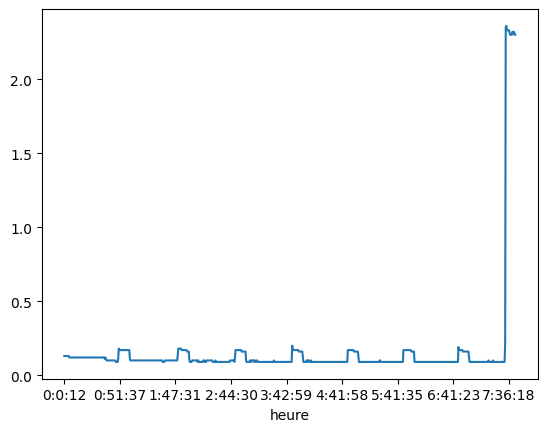

In [921]:
conso_day=conso_data[conso_data['days']==day].copy()  # no more error
conso_day['heure']=conso_day['dates'].apply(lambda x: str(x.hour)+':'+str(x.minute) +':'+str(x.second))
#=[x.hour for x in conso_day['dates']]
df= conso_day.set_index('heure')
df.tail(2000)['kWh'].plot()

In [922]:
df_byhour = df[['days','kWh']].groupby('heure', sort=False)
list(df_byhour)

[('0:0:12',
              days   kWh
  heure                 
  0:0:12  30/05/24  0.13),
 ('0:0:39',
              days   kWh
  heure                 
  0:0:39  30/05/24  0.13),
 ('0:1:6',
             days   kWh
  heure                
  0:1:6  30/05/24  0.13),
 ('0:1:35',
              days   kWh
  heure                 
  0:1:35  30/05/24  0.13),
 ('0:2:3',
             days   kWh
  heure                
  0:2:3  30/05/24  0.13),
 ('0:2:32',
              days   kWh
  heure                 
  0:2:32  30/05/24  0.13),
 ('0:3:0',
             days   kWh
  heure                
  0:3:0  30/05/24  0.13),
 ('0:3:29',
              days   kWh
  heure                 
  0:3:29  30/05/24  0.13),
 ('0:3:57',
              days   kWh
  heure                 
  0:3:57  30/05/24  0.13),
 ('0:4:26',
              days   kWh
  heure                 
  0:4:26  30/05/24  0.12),
 ('0:4:55',
              days   kWh
  heure                 
  0:4:55  30/05/24  0.12),
 ('0:5:24',
              days   

In [923]:
kwh_byhour = list(df_byhour['kWh'])
kwh_byhour

[('0:0:12',
  heure
  0:0:12    0.13
  Name: kWh, dtype: float64),
 ('0:0:39',
  heure
  0:0:39    0.13
  Name: kWh, dtype: float64),
 ('0:1:6',
  heure
  0:1:6    0.13
  Name: kWh, dtype: float64),
 ('0:1:35',
  heure
  0:1:35    0.13
  Name: kWh, dtype: float64),
 ('0:2:3',
  heure
  0:2:3    0.13
  Name: kWh, dtype: float64),
 ('0:2:32',
  heure
  0:2:32    0.13
  Name: kWh, dtype: float64),
 ('0:3:0',
  heure
  0:3:0    0.13
  Name: kWh, dtype: float64),
 ('0:3:29',
  heure
  0:3:29    0.13
  Name: kWh, dtype: float64),
 ('0:3:57',
  heure
  0:3:57    0.13
  Name: kWh, dtype: float64),
 ('0:4:26',
  heure
  0:4:26    0.12
  Name: kWh, dtype: float64),
 ('0:4:55',
  heure
  0:4:55    0.12
  Name: kWh, dtype: float64),
 ('0:5:24',
  heure
  0:5:24    0.12
  Name: kWh, dtype: float64),
 ('0:5:53',
  heure
  0:5:53    0.12
  Name: kWh, dtype: float64),
 ('0:6:22',
  heure
  0:6:22    0.12
  Name: kWh, dtype: float64),
 ('0:6:51',
  heure
  0:6:51    0.12
  Name: kWh, dtype: float64),
 

In [924]:
# premier kWh
if len(df)>1000:
    df.iloc[1000]['dates']

In [925]:
df.iloc[0].dates

Timestamp('2024-05-30 00:00:12.095964')

In [926]:
def period(p=1):
    if p==1:
        start = df.iloc[0].dates
    else:
        start = df.iloc[(p-1)*1000-1].dates
    if len(df)>p*1000:
        end = df.iloc[p*1000-1].dates
        conso = p*1000
    else:
        end = df.iloc[len(df)-1].dates
        conso = len(df) - (p-1)*1000
    period = end - start  # type timedelta
    hours = int(period / dt.timedelta(hours=1))
    mins = int(period / dt.timedelta(minutes=1)) - hours*60
    secs = int(period / dt.timedelta(seconds=1)) - hours*3600 - mins*60

    #df.iloc[1001:2000]['dates']#.tail(1)
    #print(period)
    print(f'{start}\t{end}\t{hours}h {mins}m {secs}s \t{conso}')


In [927]:
df.dates.dt.time

heure
0:0:12     00:00:12.095964
0:0:39     00:00:39.369964
0:1:6      00:01:06.792964
0:1:35     00:01:35.210964
0:2:3      00:02:03.754964
                ...       
7:36:29    07:36:29.490964
7:36:31    07:36:31.048964
7:36:32    07:36:32.603964
7:36:34    07:36:34.166964
7:36:35    07:36:35.731964
Name: dates, Length: 812, dtype: object

In [928]:
for p in range(1,6):  # les 5 tranches de kWh consommés
    if len(df)>(p-1)*1000:
        period(p)

2024-05-30 00:00:12.095964	2024-05-30 07:36:35.731964	7h 36m 23s 	812


In [929]:
# conso temps réel
here = now.strftime('%H:%M:%S')
conso_jour=len(df['kWh'])
here, len(df)/1000, conso_jour

('07:37:00', 0.812, 812)

In [930]:
df_grp.tail(7)

,kWh
days,
24/05/24,4.862
25/05/24,3.594
26/05/24,3.325
27/05/24,3.749
28/05/24,3.543
29/05/24,3.101
30/05/24,0.812


Text(0.5, 1.0, 'Week conso')

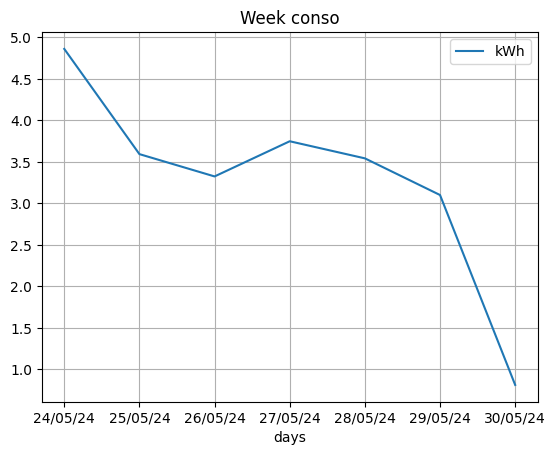

In [931]:
# last week conso
df_grp.tail(7).plot(grid=True)
plt.title('Week conso')

In [932]:
current=plt.get_current_fig_manager()
current.set_window_title('Conso by day')
#help(current.canvas)
#,facecolor='darkcyan')

<Figure size 640x480 with 0 Axes>

In [933]:
#plt.style.use('fivethirtyeight')
#plt.style.use('ggplot')
#plt.style.use('dark_background')


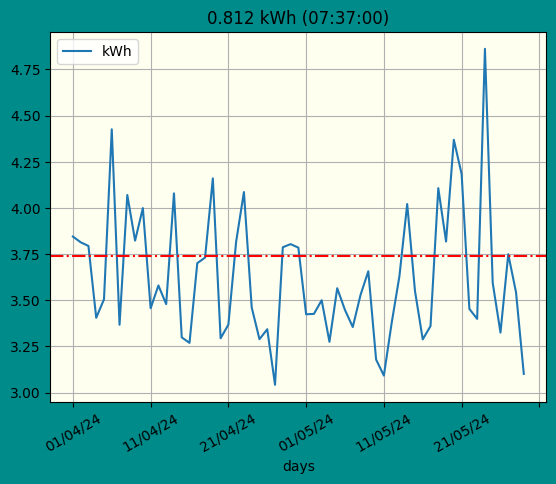

In [934]:
# pandas plot the day consos in the group
fig, ax = plt.subplots(facecolor='darkcyan')  # as argument
#or fig.patch.set_facecolor('darkcyan') # This changes the grey to white
ax.set_facecolor("ivory")
# 2 last months
df_grp.iloc[-60:-1].plot(grid=True,ax=ax, y=["kWh"])   #df.plot(x="Name", y=["Age", "Height(in cm)"], kind="bar", ax=ax)
plt.title(str(last)+' kWh ('+str(here)+')')
plt.axhline(y=np.nanmean(df_grp),c='red', ls='-.')
plt.xticks(rotation=30);  # https://ipython.readthedocs.io/en/stable/interactive/tips.html


In [945]:
#df_grp.head()
df_grp.tail()

,kWh
days,
26/05/24,3.325
27/05/24,3.749
28/05/24,3.543
29/05/24,3.101
30/05/24,0.812


In [937]:
df_grp.mean()

kWh    3.74106
dtype: float64

In [938]:
#add hours column
conso_hours = conso_day.copy()
conso_hours['hours']= conso_hours['dates'].dt.strftime('%H')
conso_hours.info()


<class 'pandas.core.frame.DataFrame'>
Index: 812 entries, 1061649 to 1062460
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Interval   812 non-null    int64         
 1   kWh        812 non-null    float64       
 2   sec        812 non-null    float64       
 3   Wh         812 non-null    float64       
 4   cumul(ms)  812 non-null    int64         
 5   dates      812 non-null    datetime64[ns]
 6   days       812 non-null    object        
 7   heure      812 non-null    object        
 8   hours      812 non-null    object        
dtypes: datetime64[ns](1), float64(3), int64(2), object(3)
memory usage: 63.4+ KB


In [939]:
day

'30/05/24'

In [940]:

# group conso by hour
groupedbyhour = conso_hours[['hours','kWh']].groupby('hours', sort=False)
list(groupedbyhour)

[('00',
          hours   kWh
  1061649    00  0.13
  1061650    00  0.13
  1061651    00  0.13
  1061652    00  0.13
  1061653    00  0.13
  ...       ...   ...
  1061766    00  0.17
  1061767    00  0.11
  1061768    00  0.10
  1061769    00  0.10
  1061770    00  0.10
  
  [122 rows x 2 columns]),
 ('01',
          hours   kWh
  1061771    01  0.10
  1061772    01  0.10
  1061773    01  0.10
  1061774    01  0.10
  1061775    01  0.10
  ...       ...   ...
  1061874    01  0.10
  1061875    01  0.09
  1061876    01  0.09
  1061877    01  0.09
  1061878    01  0.09
  
  [108 rows x 2 columns]),
 ('02',
          hours   kWh
  1061879    02  0.10
  1061880    02  0.10
  1061881    02  0.10
  1061882    02  0.10
  1061883    02  0.10
  ...       ...   ...
  1061977    02  0.09
  1061978    02  0.09
  1061979    02  0.09
  1061980    02  0.09
  1061981    02  0.09
  
  [103 rows x 2 columns]),
 ('03',
          hours   kWh
  1061982    03  0.09
  1061983    03  0.10
  1061984    03  0.1

In [941]:
groupedbyhour.count()


,kWh
hours,
00,122
01,108
02,103
03,102
04,102
05,101
06,99
07,75


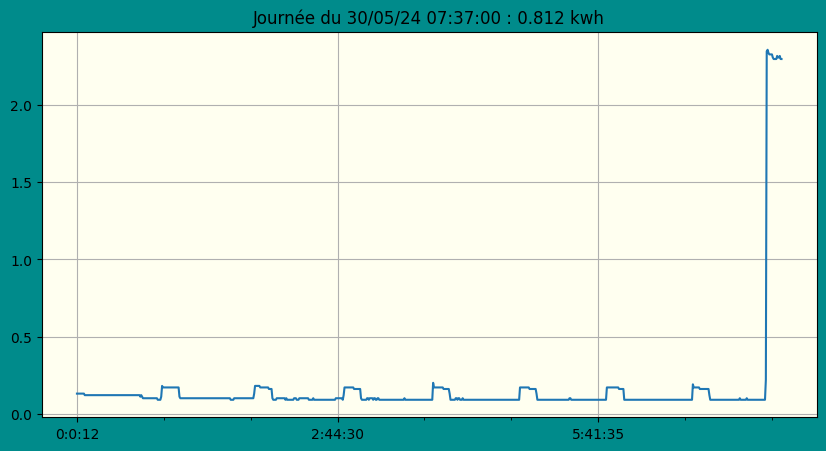

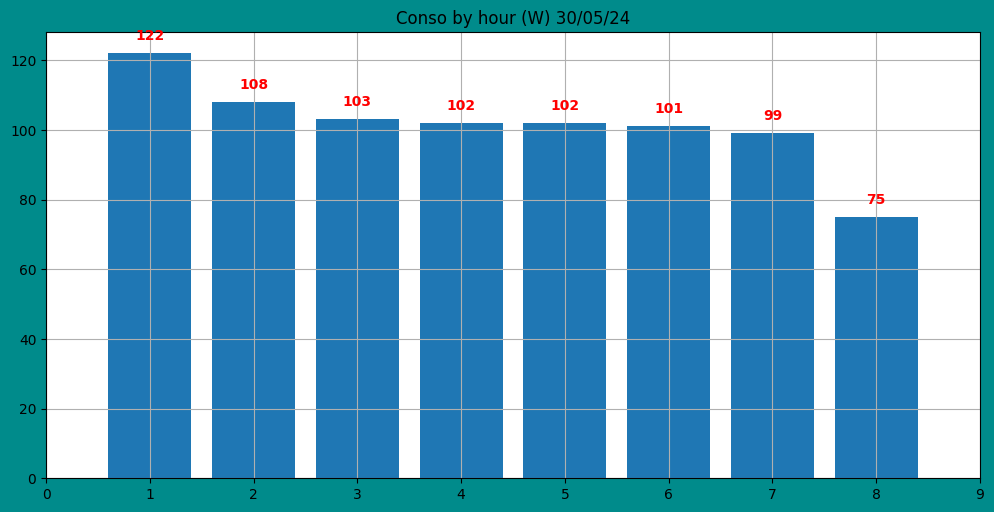

In [942]:
show(day,bgcolor='ivory')
data = groupedbyhour.count().kWh
#len(groupedbyhour)
x = np.arange(1,len(groupedbyhour)+1)
ymax = max(data)+5
#groupedbyhour.count().plot(grid=True,xticks=x)
fig, ax = plt.subplots(figsize=(10, 5), facecolor='darkcyan')

plt.bar(x,data)
plt.grid()
plt.tight_layout()
plt.title(f'Conso by hour (W) {day}')
plt.xlim(0,len(x)+1)
#plt.ylim(0,ymax)

rects = ax.patches

# Make some labels.
labels = [f"{i}" for i in data]
fontfamily = {'calibri', 'serif', 'sans-serif', 'cursive', 'fantasy', 'monospace'}
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(
        rect.get_x() + rect.get_width() / 2, height + 3, label, ha="center", va="bottom",
        fontfamily=fontfamily, fontsize=10, fontweight='bold', color='red'
    )


In [943]:
# save to file
import pickle
path = r'../consobyhour.pkl'
with open(path,'wb') as file:
    pickle.dump(data, file)

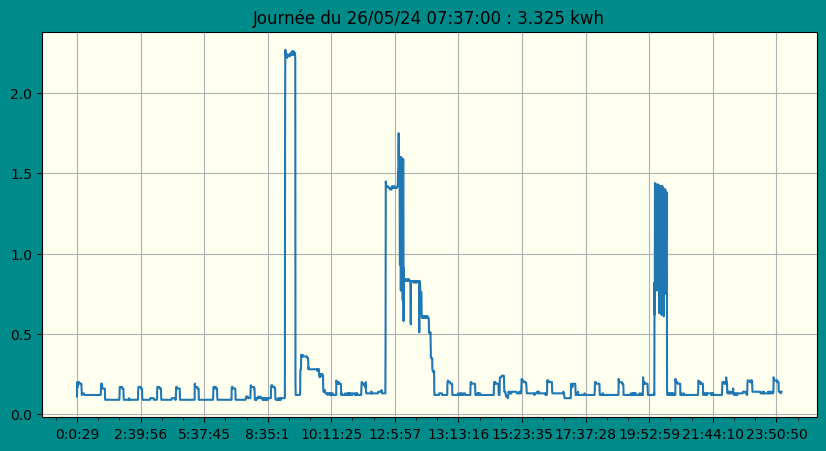

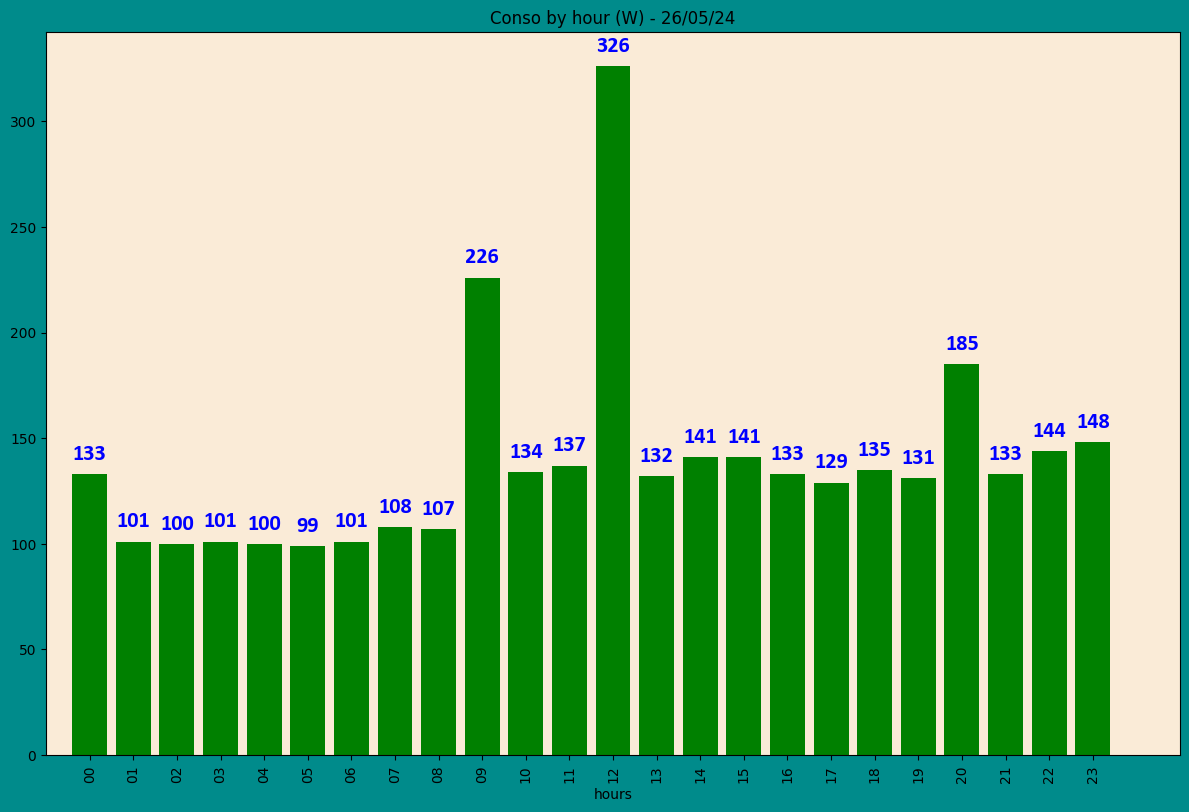

In [944]:
# plot any day
day = '26/05/24'
show(day,pltcolor='darkcyan')
conso_byhour(day)